In [1]:
import matplotlib.pyplot as plt
import pickle5 as pickle
import os
from tqdm import tqdm
import numpy as np
import sys
sys.path.append('../../src/original')
from example_reactiondiffusion import get_rd_data

In [2]:
simulation_length = 1000

_, _, test_data = get_rd_data('./reaction_diffusion.mat', random=False)

In [3]:
model_names = sorted(os.listdir('./resimulations'))

In [4]:
COSSIM = {}

In [5]:
for name in tqdm(model_names):
    with open(f'./resimulations/{name}', 'rb') as file:
        resimulation = pickle.load(file)
    COSSIM[name] = np.array([np.sum(test_data['x'] * resimulation[i], axis=(1)) / (np.linalg.norm(test_data['x'], axis=(1)) * np.linalg.norm(resimulation[i], axis=(1))) for i in range(1)])
    COSSIM[name][np.isnan(COSSIM[name])] = 0

100%|██████████| 92/92 [00:13<00:00,  6.75it/s]


In [6]:
mCOSSIM= {}

In [7]:
mCOSSIM['PTAT'] = np.array([COSSIM[name] for name in model_names if name.startswith('PTAT')]).mean(1)
mCOSSIM['pAE'] = np.array([COSSIM[name] for name in model_names if name.startswith('pAE')]).mean(1)
mCOSSIM['R'] = np.array([COSSIM[name] for name in model_names if name.startswith('R')]).mean(1)
mCOSSIM['V'] = np.array([COSSIM[name] for name in model_names if name.startswith('V')]).mean(1)
mCOSSIM['O'] = np.array([COSSIM[name] for name in model_names if name.startswith('O')]).mean(1)

In [8]:
best_models = {name: np.argmax(mCOSSIM[name].sum(1)) for name in mCOSSIM.keys()}
worst_models = {name: np.argmin(mCOSSIM[name].sum(1)) for name in mCOSSIM.keys()}

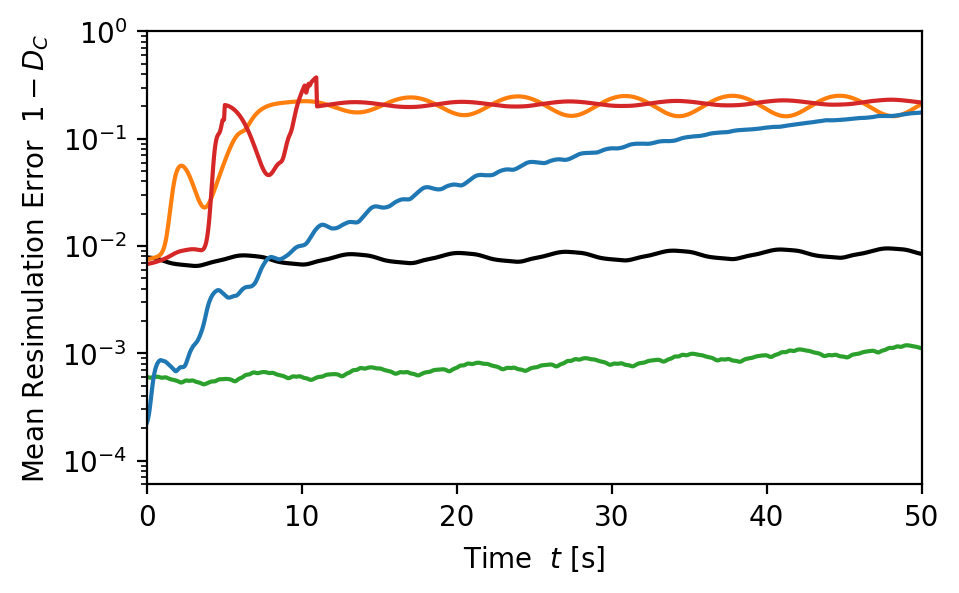

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=200)

t = np.linspace(0, test_data['t'][:, 0].max() - test_data['t'][:, 0].min(), len(test_data['t']))

for name, longname, color in zip(
    ['O', 'V', 'R', 'PTAT', 'pAE',],
    ['Original', 'Verified', 'Replicated', 'PTAT', 'pAE'], 
    ['black', 'tab:orange', 'tab:red', 'tab:green', 'tab:blue']):

    ax.plot(t, 1 - mCOSSIM[name].mean(0), color=f'{color}', label=longname)

ax.set_xlabel(r'Time  $t$ [s]'),  ax.set_xlim(0, 50); ax.set_ylim(6e-5, 1); ax.set_yscale('log'); ax.set_ylabel(r'Mean Resimulation Error  $1 - D_C$'); #ax.legend();